<a href="https://colab.research.google.com/github/maxim-popkov/study/blob/master/ai-code/sketch_demo_pandas_on_steroids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install sketch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import sketch
import pandas as pd

In [3]:
sales_data = pd.read_csv("https://gist.githubusercontent.com/bluecoconut/9ce2135aafb5c6ab2dc1d60ac595646e/raw/c93c3500a1f7fae469cba716f09358cfddea6343/sales_demo_with_pii_and_all_states.csv")

In [4]:
sales_data[:3]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Credit Card,SSN
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"10995 Williams Cliffs, East Michelleborough, A...",9753-7632-8228-2717,499-70-8008
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"1067 Guzman View Suite 342, Tylerton, TX 75901",4353-8782-6482-8223,596-54-9892
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"7616 Lauren Run Apt. 642, South Julia, CO 81368",2581-0339-8831-3503,608-47-3943


In [5]:
sales_data.shape

(185950, 8)

In [6]:
sales_data.sketch.ask("What columns might have PII information in them?")

In [7]:
sales_data.sketch.ask("Can you give me friendly names for each column? (output as an HTML list)")

In [8]:
sales_data['Purchase Address'][:3]

0    10995 Williams Cliffs, East Michelleborough, A...
1       1067 Guzman View Suite 342, Tylerton, TX 75901
2      7616 Lauren Run Apt. 642, South Julia, CO 81368
Name: Purchase Address, dtype: object

In [9]:
sales_data.sketch.howto("Create some derived features from the address")

In [10]:

# Create a new column for the city
sales_data['City'] = sales_data['Purchase Address'].apply(lambda x: x.split(',')[1])

# Create a new column for the state
sales_data['State'] = sales_data['Purchase Address'].apply(lambda x: x.split(',')[2].split(' ')[1])

# Create a new column for the zipcode
sales_data['Zipcode'] = sales_data['Purchase Address'].apply(lambda x: x.split(',')[2].split(' ')[2])


In [12]:
sales_data.sketch.howto("Get the top 5 grossing states")

In [13]:

# Get the top 5 grossing states

# Calculate total sales per state
state_sales = sales_data.groupby('State')['Price Each'].sum().reset_index()

# Sort the dataframe by total sales in descending order
state_sales = state_sales.sort_values(by='Price Each', ascending=False)

# Get the top 5 grossing states
top_5_states = state_sales.head(5)

# Print the results
print(top_5_states)


   State  Price Each
4     CA  4222370.22
42    TX  2940575.44
8     FL  2166926.57
33    NY  2070624.71
13    IL  1413911.86


In [14]:
sales_data.sketch.howto("Plot some EDA charts for insights")

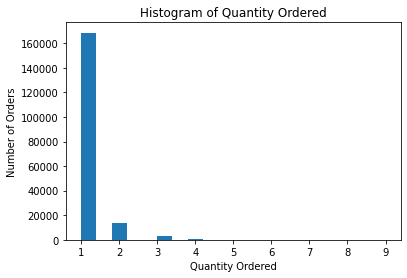

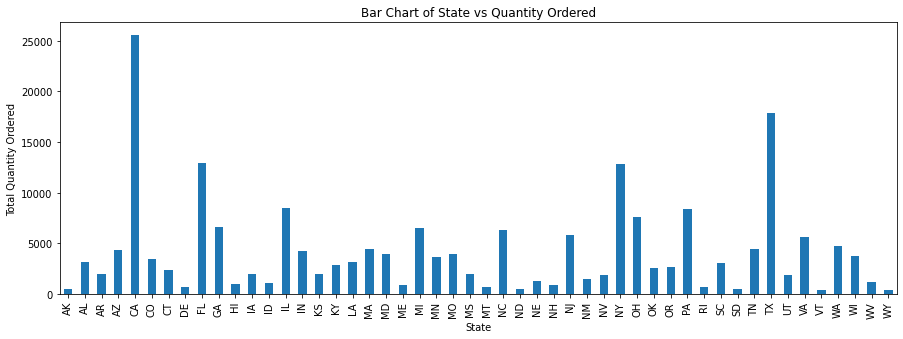

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

#load dataframe
# sales_data = pd.read_csv('sales_data.csv')

#plot histogram of Quantity Ordered
plt.hist(sales_data['Quantity Ordered'], bins=20)
plt.xlabel('Quantity Ordered')
plt.ylabel('Number of Orders')
plt.title('Histogram of Quantity Ordered')
plt.show()

#plot bar chart of State vs Quantity Ordered
state_group = sales_data.groupby('State').sum()['Quantity Ordered']
state_group.plot(kind='bar', figsize=(15,5))
plt.xlabel('State')
plt.ylabel('Total Quantity Ordered')
plt.title('Bar Chart of State vs Quantity Ordered')
plt.show()

In [17]:
sales_data.sketch.ask("What features i can forecast")

In [18]:
sales_data[:3]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Credit Card,SSN,City,State,Zipcode
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"10995 Williams Cliffs, East Michelleborough, A...",9753-7632-8228-2717,499-70-8008,East Michelleborough,AZ,86031
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"1067 Guzman View Suite 342, Tylerton, TX 75901",4353-8782-6482-8223,596-54-9892,Tylerton,TX,75901
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"7616 Lauren Run Apt. 642, South Julia, CO 81368",2581-0339-8831-3503,608-47-3943,South Julia,CO,81368


In [22]:
sales_data.sketch.howto("Write code for forecast future Price and evaluate quality")

In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

#create a linear regression model
model = LinearRegression()

#split the data into features and target variables
X = sales_data[['Quantity Ordered', 'Price Each']]
y = sales_data['Price Each']

#fit the model to the data
model.fit(X, y)

#predict future Price using the model
future_price = model.predict(X)

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#split the data into training and testing sets
X = sales_data[['Quantity Ordered', 'Price Each']]
y = sales_data['Price Each']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#fit the linear regression model to the training data
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

#predict the future price using the test data
y_pred = regressor.predict(X_test) 

#evaluate the quality of the prediction using mean squared error (MSE)
from sklearn.metrics import mean_squared_error 
mse = mean_squared_error(y_test, y_pred) 
print('Mean Squared Error:', mse) 

Mean Squared Error: 1.0872756755293277e-24


In [27]:
sales_data.sketch.ask("Which features is categorical?")

In [38]:
sales_data.sketch.howto("Write code for forecast City and evaluate it with multiclass metric, and you need encode categorical features, Product, Order Date, Purchase Address, Credit Card, SSN, City, State, and Zipcode")

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataframe
df = sales_data.copy()

# Encode categorical features
le = LabelEncoder()
df['Product'] = le.fit_transform(df['Product'])
df['Order Date'] = le.fit_transform(df['Order Date'])
df['Purchase Address'] = le.fit_transform(df['Purchase Address'])
df['Credit Card'] = le.fit_transform(df['Credit Card'])
df['SSN'] = le.fit_transform(df['SSN'])
df['City'] = le.fit_transform(df['City'])
df['State'] = le.fit_transform(df['State'])
df['Zipcode'] = le.fit_transform(df['Zipcode'])

# Split the data into features and target variable 
X = df.drop('City', axis=1) # Features 
y = df['City'] # Target variable 

# Split the data into train and test sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
  
# Train the model using the training sets 
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(n_estimators=100, random_state=0) 
clf.fit(X_train, y_train) 
  
# Predict the response for test dataset 
y_pred = clf.predict(X_test) 
  
# Evaluate the model using multiclass metrics 
print("Accuracy:", accuracy_score(y_test, y_pred)) 
print("Precision:", precision_score(y_test, y_pred, average='macro'))

In [36]:
from sklearn import metrics
# Evaluate the model 
y_pred = clf.predict(X_test) 
print("Accuracy:", metrics.classification_report(y_test, y_pred)) 

Accuracy:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        88
           1       1.00      1.00      1.00       528
           2       1.00      0.98      0.99       344
           3       1.00      1.00      1.00       803
           4       1.00      1.00      1.00      4485
           5       1.00      1.00      1.00       622
           6       0.98      1.00      0.99       440
           7       1.00      0.93      0.96       115
           8       1.00      1.00      1.00      2310
           9       1.00      1.00      1.00      1186
          10       1.00      1.00      1.00       162
          11       1.00      1.00      1.00       329
          12       0.98      1.00      0.99       185
          13       1.00      1.00      1.00      1471
          14       1.00      1.00      1.00       790
          15       0.99      1.00      0.99       363
          16       1.00      1.00      1.00       531
          17     

In [19]:
sales_data.sketch.howto("Suggest method for cluster users relevant to their Purchase interest (also you need encode categorical features), and visualise clusters in 2-dim scatter")

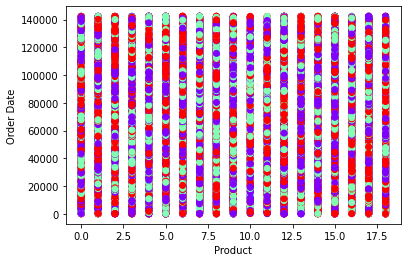

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Read the dataframe
df = sales_data.copy()

# Encode categorical features
le = LabelEncoder()
df['Product'] = le.fit_transform(df['Product'])
df['Order Date'] = le.fit_transform(df['Order Date'])
df['Purchase Address'] = le.fit_transform(df['Purchase Address'])
df['Credit Card'] = le.fit_transform(df['Credit Card'])
df['SSN'] = le.fit_transform(df['SSN'])
df['City'] = le.fit_transform(df['City'])
df['State'] = le.fit_transform(df['State'])
df['Zipcode'] = le.fit_transform(df['Zipcode'])

# Create a new dataframe with encoded features 
X = df[['Product', 'Order Date', 'Purchase Address', 'Credit Card', 'SSN', 'City', 'State', 'Zipcode']]

# Fit the model and predict clusters 
kmeans = KMeans(n_clusters=3, random_state=0).fit(X) 
labels = kmeans.labels_ 
  
# Visualize the clusters 
plt.scatter(X['Product'], X['Order Date'], c=labels, cmap='rainbow') 
plt.xlabel('Product') 
plt.ylabel('Order Date') 
plt.show() 

In [21]:
sales_data.sketch.howto("Suggest method for cluster users relevant to their Purchase interest (also you need encode categorical features), and draw plots for clusters and insight")

In [24]:
# Encode categorical features
le = LabelEncoder()
df['Product'] = le.fit_transform(df['Product'])
df['Order Date'] = le.fit_transform(df['Order Date'])
df['Purchase Address'] = le.fit_transform(df['Purchase Address'])
df['Credit Card'] = le.fit_transform(df['Credit Card'])
df['SSN'] = le.fit_transform(df['SSN'])
df['City'] = le.fit_transform(df['City'])
df['State'] = le.fit_transform(df['State'])
df['Zipcode'] = le.fit_transform(df['Zipcode'])

# Create a new dataframe with encoded features 
X = df[['Product', 'Order Date', 'Purchase Address', 'Credit Card', 'SSN', 'City', 'State', 'Zipcode']]

# Fit the KMeans model to the data 
kmeans = KMeans(n_clusters=5) 
kmeans.fit(df) 

labels = kmeans.labels_ 
centroids = kmeans.cluster_centers_ 

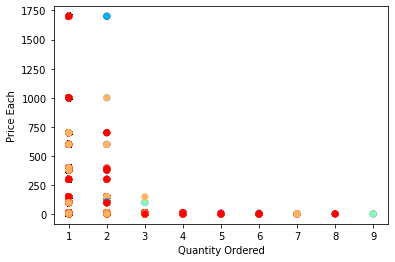

In [25]:
# Create a new column in the dataframe with the cluster labels 
df['cluster_label'] = labels 
  
# Plot the clusters using a scatter plot 
plt.scatter(df['Quantity Ordered'], df['Price Each'], c=labels, cmap='rainbow') 
plt.xlabel('Quantity Ordered') 
plt.ylabel('Price Each') 
plt.show() 